# Identifikasi Masalah

## Latar Belakang

Windows Store merupakan platform yang menyediakan berbagai aplikasi untuk kebutuhan sistem operasi Windows. Pada platform tersebut tersedia berbagai kategori yang memudahkan untuk pencarian aplikasi, terdapat juga rating yang dapat melihat kualitas suatu aplikasi berdasarkan pengalaman beberapa user, sehingga bisa mempertimbangkan apabila ingin mencoba aplikasi tersebut.

Pada penelitian ini penulis ingin mengetahui apakah terdapat hubungan antara rating dengan harga aplikasi pada platform tersebut.

## Topik Permasalahan

Pihak Windows Store ingin menganalisis apakah harga aplikasi yang dijual berpengaruh terhadap rating aplikasi. Oleh karena itu, mereka meminta bantuan seorang data scientist untuk melakukan analisis. Pihak Windows Store juga ingin melihat apakah perbandingan antara harga dengan kepuasan user berbanding lurus atau tidak.


## Problem Statement


Mengetahui kaitan pada Aplikasi di Windows Store antara harga dengan rating aplikasi dan jumlah user yang dipublikasikan sampai periode terakhir data tercatat

SMART

Specific    : Aplikasi-aplikasi yang terdapat pada Windows Store

Measurable  : Jumlah rating aplikasi yang mencerminkan pengguna aplikasi pada Windows Store

Achievable  : Meningkatkan kualitas Windows Store dengan memastikan rating berbanding lurus dengan harga aplikasi

Relevant    : Dengan mengetahui hubungan antara rating aplikasi dengan harga kita bisa meningkatkan minat user terhadap produk berbayar Windows Store dengan mempertimbangkan produk-produk yang layak sesuai dengan harganya

Time-Bound  : Meningkatkan kualitas aplikasi berbayar di Windows Store pada tahun berikutnya




## Penjabaran Masalah

1. Kategori apa yang memiliki banyak rating rendah?

2. Apakah harga aplikasi yang tinggi sebanding dengan rating yang tinggi?

3. Berapa banyak rating rendah dari setiap category?

4. Kategori mana yang memiliki angka install terbanyak?

5. Mengapa pihak Windows Store ingin melakukan analisis hal tersebut?

6. Bagaimana pihak Windows Store mendistribusikan harga pada aplikasi?

7. Hubungan apa antara rating dengan harga?

# Data Loading

Data yang digunakan berasal dari Kaggle mengenai [Windows Store
](https://www.kaggle.com/datasets/vishnuvarthanrao/windows-store)


Penjelasan kolom
- Name      : Name of the app.
- Rating: Rating for the app.
- No of People Rated : No of people who rated the app.
- Category : Category of the app.
- Date. : Date when it is posted.
- Price. : Price of the app.

In [22]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import objects as so
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
!mkdir /root/.kaggle                                                                  # Membuat folder .kaggle di /root

!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' /root/.kaggle/kaggle.json    # Mengcopy kaggle.json ke folder /root/.kaggle

!kaggle datasets download -d vishnuvarthanrao/windows-store                           # Mendonwload datasets dari kaggle

!unzip '/content/windows-store.zip'                                                   # Mengekstrak datasets yang sebelumnya sudah didownload


mkdir: cannot create directory ‘/root/.kaggle’: File exists
windows-store.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/windows-store.zip
replace msft.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [24]:
df = pd.read_csv ('/content/msft.csv')  # Membuat dataframe dari csv
df.sort_values('Date', ascending=True)  # memperlihatkan data 5 teratas dan terbawah, dan diurutkan berdasarkan 'Date'

,Name,Rating,No of people Rated,Category,Date,Price
854,HP Anywhere,4.0,263,Business,01-01-2014,Free
5099,Nasa Launch Schedule,5.0,183,News and Weather,01-01-2015,Free
2772,Prego Box,3.0,362,Health and Fitness,01-01-2015,Free
3368,Wicca,3.5,493,Lifestyle,01-01-2015,Free
4140,Random Audio,4.0,626,Music,01-01-2015,Free
...,...,...,...,...,...,...
2498,WeCanSpeak,4.5,833,Health and Fitness,31-12-2019,Free
5233,PDF Reader for Adobe PDF,3.0,354,Business,31-12-2019,₹ 574.00
2493,clinytics,5.0,364,Health and Fitness,31-12-2019,Free
1615,Charta,5.0,761,Developer Tools,31-12-2019,Free


In [25]:
df.info() # Melihatkan tipe kolom, agar mendeteksi adanya kesalahan, terdapat pada kolom 'Date' yang bertipe object yang seharusnya adalah datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [26]:
df.isnull().sum() # Mengecek jumlah baris yang tidak memiliki data

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [27]:
df = df.dropna()  # Membuang baris yg berisi null
df.isnull().sum() # Mengecek jumlah baris null setelah dibuang

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [28]:
df = df[df['Price'] != 'Free']                # Memfilter yang tidak Free, karena yang dianalisa hanya yang berbayar
df.sort_values(by = 'Price', ascending=False)

,Name,Rating,No of people Rated,Category,Date,Price
5166,WinRAR PC-Guide,1.0,523,Books,22-11-2019,₹ 99.00
5303,PairBLENow,5.0,436,Developer Tools,19-01-2017,₹ 99.00
5176,ccleaner user: guide,2.0,865,Books,16-12-2019,₹ 99.00
5194,Guide for firefox,3.5,625,Books,06-03-2020,₹ 94.00
5283,Bluetooth Terminal+,4.0,796,Developer Tools,09-11-2019,₹ 89.50
...,...,...,...,...,...,...
5299,Offline Documentation Browser,1.0,153,Developer Tools,13-03-2020,"₹ 1,149.00"
5180,Oxford Hachette French Dictionary,3.5,156,Books,22-07-2014,"₹ 1,099.00"
5228,"PDF Reader Pro-Annotate, Edit, Convert, Fill F...",4.5,446,Business,25-11-2019,"₹ 1,099.00"
5304,SCADAvis.io Synoptic Editor,1.0,359,Developer Tools,12-07-2018,"₹ 1,099.00"


# Data Cleaning

In [30]:
df['Date'] = pd.to_datetime (df['Date'], format='%d-%m-%Y') # Merubah tipe kolom 'Date' dari object menjadi datetime64
df.info()                                                   # Mengecek tipe data setelah dirubah

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 5163 to 5320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                158 non-null    object        
 1   Rating              158 non-null    float64       
 2   No of people Rated  158 non-null    int64         
 3   Category            158 non-null    object        
 4   Date                158 non-null    datetime64[ns]
 5   Price               158 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.6+ KB


In [32]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float) # Menghilangkan karakter ₹ dan menghilangkan , dalam ribuan
df['Price'] = pd.to_numeric(df['Price'])                                          # Mengubah tipe price menjadi numeric
df.sort_values('Date')                                                            # Diurutkan berdasarkan Date

,Name,Rating,No of people Rated,Category,Date,Price
5179,freda+,4.5,291,Books,2011-01-21,109.0
5182,Merriam-Webster Dictionary Recommended by Dell,1.5,693,Books,2012-10-09,269.0
5200,C.B.R. - Comic Book Reader,2.0,149,Books,2013-01-11,79.0
5204,Chambers Thesaurus,4.5,666,Books,2013-01-30,299.0
5183,"Oxford Advanced Learner's Dictionary, 8th edition",4.0,403,Books,2013-01-31,1624.0
...,...,...,...,...,...,...
5171,Camtasia Tutor,1.0,495,Books,2020-06-22,269.0
5167,Windows Movie Maker : PC Guide,1.0,515,Books,2020-06-22,144.0
5221,Screen Mirror to MiraCast,1.0,216,Business,2020-06-24,269.0
5164,Adobe Acrobat Reader DC PC Guide,2.0,163,Books,2020-06-28,144.0


# Analisis dan Perhitungan

In [34]:
df['Category'].unique() # Melihat pada kolom 'Category' memiliki data apa saja, terlihat hanya Books, Business, dan Developer Tools

array(['Books', 'Business', 'Developer Tools'], dtype=object)

## Penjabaran 1

Kategori yang memiliki rating terendah ada pada kategori `Books` dirate sebanyak 6738, untuk `Business` sebanyak 21558, dan untuk `Developer Tools` sebanyak 4308, dapat ditarik kesimpulan bahwa pada kategori `Business` banyak aplikasi yang dinilai dengan rating rendah

In [12]:
df.groupby(['Category', 'Rating'])['No of people Rated'].sum()    # Melihat jumlah 'No of people Rated' pada setiap 'Rating' disemua 'Category'

Category         Rating
Books            1.0        6738
                 1.5        4891
                 2.0        2687
                 2.5        1105
                 3.0        1344
                 3.5        1332
                 4.0        4495
                 4.5        3401
                 5.0        2298
Business         1.0       21558
                 1.5        2743
                 2.0         383
                 2.5         239
                 3.0         751
                 3.5         881
                 4.0        1278
                 4.5         446
Developer Tools  1.0        4308
                 1.5         848
                 2.0        2186
                 2.5        2380
                 3.0        2589
                 3.5        4949
                 4.0        5215
                 4.5        1840
                 5.0        5497
Name: No of people Rated, dtype: int64

<Axes: xlabel='Rating', ylabel='No of people Rated'>

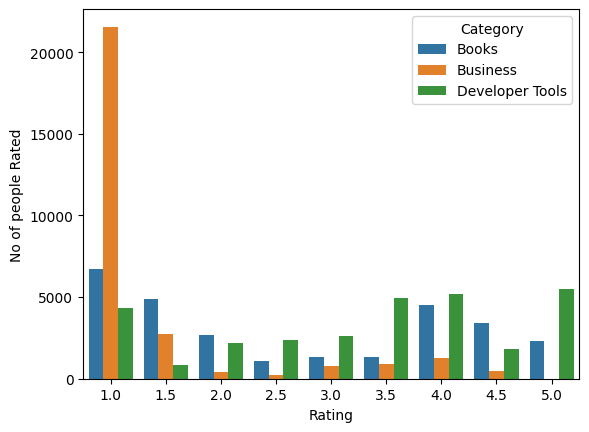

In [13]:
sns.barplot(data=df, x="Rating", y="No of people Rated", hue="Category", estimator=sum, errorbar=None, dodge=True)  # Membuat visualisasi data antara Rating dengan No of people Rated pada setiap Category

## Penjabaran 2

Berdasarkan hasil, terlihat bahwa masih banyak yang tidak mematok tinggi harga aplikasi, tetapi bisa terlihat juga bahwa aplikasi yang harga tinggi tersebut hanya bisa mendapatkan rating 3, sebaliknya terdapat aplikasi yang harganya tidak tinggi tapi mendapatkan rating yang maksimal.

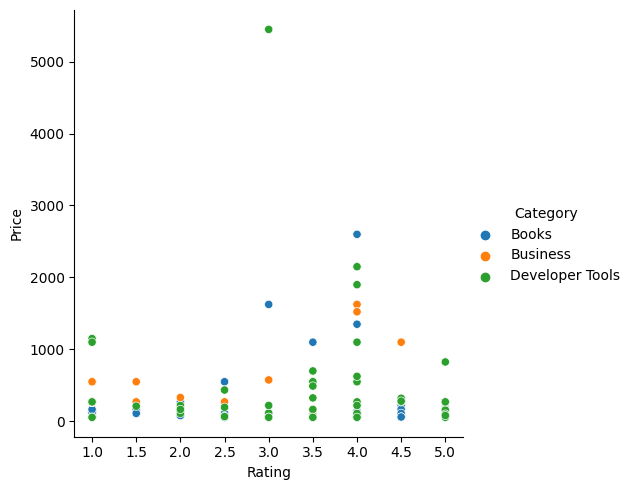

In [14]:
sns.relplot(data=df, x="Rating", y="Price", hue="Category") # Membuat visualisasi penyebaran data Rating dan Price

## Penjabaran 3

Terlihat bahwa pada aplikasi dengan kategori `Business` memiliki persentase terbanyak pada nilai rating 1 sebesar 66%

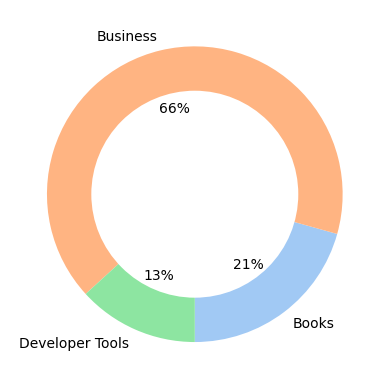

In [15]:
df_3 = df.groupby(['Category', 'Rating'],)['No of people Rated'].sum().reset_index()    # Membuat dataframe baru
df_3 = df_3[df_3["Rating"] == 1.0]                                                      # Memfilter yang rating hanya 1

# Membuat visualisasi datanya
palette_color = sns.color_palette('pastel')
plt.pie(df_3['No of people Rated'], labels=df_3['Category'], colors=palette_color, autopct='%.0f%%', startangle=270)

# Memberikan efek bolong pada tengah lingkaran
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

## Penjabaran 4

Berdasarkan hasil yang telah dibuat, user yang memberikan rating user yang menginstall aplikasi tersebut, sehingga kategori yang banyak di install oleh user adalah `Developer Tools`

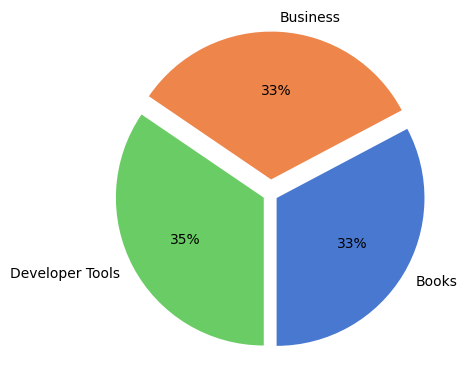

In [16]:
df_4 = df.groupby(['Category'])['No of people Rated'].sum()  # Membuat dataframe baru berdasarkan jumlah 'No of people Rated' dengan 'Category'

# Membuat visualisasi data
palette_color = sns.color_palette('muted')

plt.pie(df_4, labels=df_4.index, colors=palette_color, autopct='%.0f%%', explode=[0.05, 0.1, 0.05], startangle=270)

plt.show()

## Penjabaran 5

Dari penjabaran berikut, pada kategori `Books` dan `Business` memiliki angka modus yang kecil dan pada kategori `Developer Tools` memiliki angka modus yang lumayan tinggi

In [35]:
# Mengulangkan pada setiap Category
def mode(x):
    return x.value_counts().idxmax()

# Membuat dataframe untuk melihatkan Central Tendency dari setiap Category
df_5 = df.groupby('Category')['Rating'].agg(mean='mean', median='median', mode=lambda x: x.mode().iat[0]).reset_index()
df_5 = df_5.rename(columns={'mean':'Mean Rating', 'median':'Median Rating', 'mode':'Modus Rating'})
df_5

,Category,Mean Rating,Median Rating,Modus Rating
0,Books,2.705357,2.5,1.0
1,Business,1.451923,1.0,1.0
2,Developer Tools,3.290000,3.5,4.0


## Penjabaran 6

Berdasarkan penjabaran, banyak aplikasi yang belum berani mematok dengan harga tinggi padahal kemungkinan aplikasi tersebut dapat dijual dengan harga tinggi

Nilai Skewness : 5.43


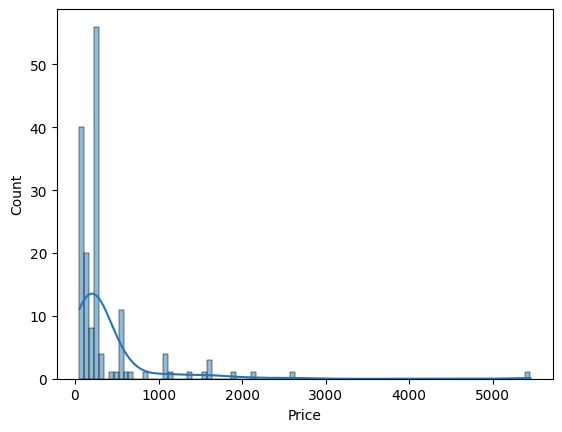

In [18]:
print ('Nilai Skewness :', df['Price'].skew().round(decimals=2))  # Melihatkan nilai skewness dari Price

sns.histplot(df['Price'], kde=True);                              # Membuat visualisasi histogram dari Price

## Penjabaran 7
- H0 : Rating tidak berpengaruh terhadap harga
- H1 : Rating berpengaruh terhadap harga

In [19]:
from scipy.stats import pearsonr

for i in df['Category'].unique():
  df[df['Category'] == i]
  t_stat, p_val = pearsonr(df[df['Category'] == i]['Rating'], df[df['Category'] == i]['Price'])

  if p_val > 0.05:
	  print(i, ': Probably independent / fail to reject H0')
  else:
	  print(i, ': Probably dependent / Reject H0')

Books : Probably independent / fail to reject H0
Business : Probably dependent / Reject H0
Developer Tools : Probably independent / fail to reject H0


Berdasarkan hasil diatas, dapat ditarik kesimpulan bahwa pada kategori `Books` dan `Developer Tools` rating tidak berpengaruh terhadap harga, sedangkan untuk `Business` berpengaruh terhadap harga


# Kesimpulan

Berdasarkan hasil penjabaran-penjabaran diatas, terdapat kaitan antara harga dengan rating beserta jumlah user
- Pada kategori `Business` yang dimana memiliki jumlah aplikasi terbanyak ratingnya dipengaruhi oleh harga aplikasi, walaupun memiliki rating rendah terbanyak dibandingkan kategori lainnya
- Pada kategori lainnya yaitu `Developer Tools` yang terbanyak digunakan oleh user dan `Books` harga yang diberikan oleh Windows Store tidak mencerminkan rating yang artinya kualitas aplikasi tersebut masih kurang.

Harga yang tinggi belum tentu mendapatkan rating yang tinggi dan juga harga yang rendah belum tentu mendapatkan rating yang rendah, sehingga harus memperhatikan faktor lainnya.




In [20]:
df.to_csv('h8dsft_Milestone1_Farhan.csv')   # Mengeksport data yang sudah dilakukan data cleaning untuk digunakan pada Tableau
